### Lab C: Fibonacci Matrix, Markov Chains & Linear Predator-Prey###

**Problem 1a.** The Fibonacci recurrence is:
 \begin{align*}
  f[n+1] &= f[n] + f[n-1] \qquad \qquad  {for } \quad n > 2    \\
  [f_1, f_0]^T &= [1, 0]^T \\
  \end{align*}
 Express this as a matrix-vector relation: $G x_k = x_{k+1}$ where $x_k = [f_k, f_{k-1}]^T$ \&
$x_{k+1} = [f_{k+1}, f_k]^T$ 

( Where G is a $2\times 2$ matrix).

Find the matrix $G$ for this transformation. Carry out the matrix multiplication for 8 steps.
Use {\tt numpy.linalg.matrix\_power}
(See : [Fibbonacci Numbers in nature](http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/fibnat.html)).

The matrix is of interest. This matrix can be the starting point of carry out population distribution studies among animals in their various life-stages (more in Tuesday's lecture)


In [18]:
import numpy as np
from numpy.typing import ArrayLike
from numpy.linalg import inv, matrix_power
import matplotlib.pyplot as plt

# truning the Fibonacci equation into a matrix equation
# Its going to be a matrix multiplication

'''
[8]   =   [(1 X 5) + (1 X 3)]   [5]
[5]       [(1 X 5) + (0 X 3)]   [3]

[1 1]
[1 0]
'''
# that unknown matrix is G

X_k = np.array([5, 3])
X_k1 = np.array([8, 5])

G = np.array([[1, 1],
              [1, 0]])

new_array = np.array([1, 0])


for i in range(8 + 1):
    resultant_matrix = G@new_array
    new_array = resultant_matrix

print(new_array)


    

[55 34]


**Problem 1b** Use the matrix power function from *numpy.linalg.matrix_power* and calculate $G^3, G^5, G^{10}$. Do you notice anything about the elements of the matrices (you may also want to look at Assignment 1).

In [20]:
print(matrix_power(G, 5))
print(matrix_power(G, 3))
print(matrix_power(G, 10))


[[8 5]
 [5 3]]
[[3 2]
 [2 1]]
[[89 55]
 [55 34]]


**Problem 2** In the following problem, you are going to apply matrix-vector multiplication to study a 
(linear) Predator-Prey interaction.

In the forests of N. California, Dusky-footed Wood Rats provide 80\% of the diet for the Northern Spotted Owl. First, try a simple linear model of the dynamical system that makes up the owls and the rats.

The populations at timestep  $𝑘$ are given by  $x_k = [Owls_k, Rats_k]$, where $Rats_k$ are in  $1000′𝑠$ of rats.

In the absence of predation (by owls), the rat pop grows by 10% per month (this is the timestep for the model). With no rats for food, the owl population falls to one-half the pop in the prev month. The predation rate of rats is $p$
  (take **p = 0.104** to start the experiment). 
  
Since we have a linear model, there are no Owl-Rat interactions (encounters) in the model, we simulate that by an 
"efficiency* by which the Owls turn Rats into Owls with a conversion efficiency of 0.4 (i.e. when there are abundant Rats, the Owl pop rises by $0.4∗𝑅𝑎𝑡𝑠$.

\begin{align}
  Owls_{n+1} &= 0.5\cdot Owls_n + 0.4\cdot Rats_n\\
  Rats_{n+1} &= -p\cdot Owls_n + 1.1\cdot Rats_n\\
\end{align}

Solve this as a matrix equation by generating $𝑥_1,𝑥_2, \ldots 𝑥_𝑘$ as usual. Remember, each $x_i = [Owls_i, Rats_i]$.
Use $k = 50$. Store the Owl numbers, in each step $i$, in an array $Owl[i]$ and the Rat numbers (in 1000's) in another array $Rats[i]$. 

Using the arrays $Owl[i]$, $Rats[i]$, make (i) a plot of the Owl Pop. v/s Time and the Rat Pop. v/s Time on the same axes. Now, since this is a *difference* equation, the time step 
(of a month) is implicit in the model. The time axis is generated using the *numpy* function *linspace* with $k$ intervals (make *endpoint=True*). {\bf On the same plot}  (ii) Plot $Owl[i]$ v/s $Rat[i]$. 

Experiment with $[Owl_0, Rats_0] = [20, 40], \ [35, 40] \ [45, 40] \ [60, 40] \ [80, 40]$ Experiment with changing the predation rate $p$ (pick 4 different values to see the effects on the curves obtained).


*To plot numpy arrays $X, Y$ on the same time $t$ axes:  *plt.plot(t, X, 'r-', t, Y, 'b--')*

*To make 2 plots side-by-side; use the *matplotlib.pyplot* function *subplot(1,2,1)* before the first plot command and *subplot(1,2,2)* before the second plot command)




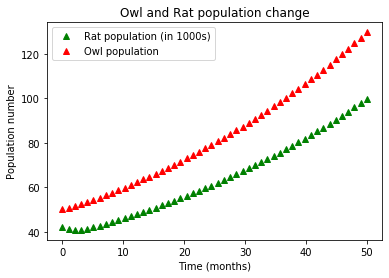

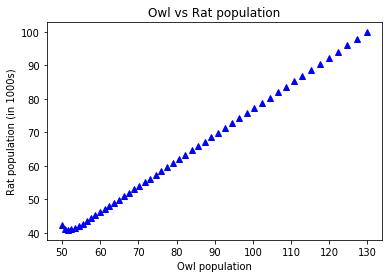

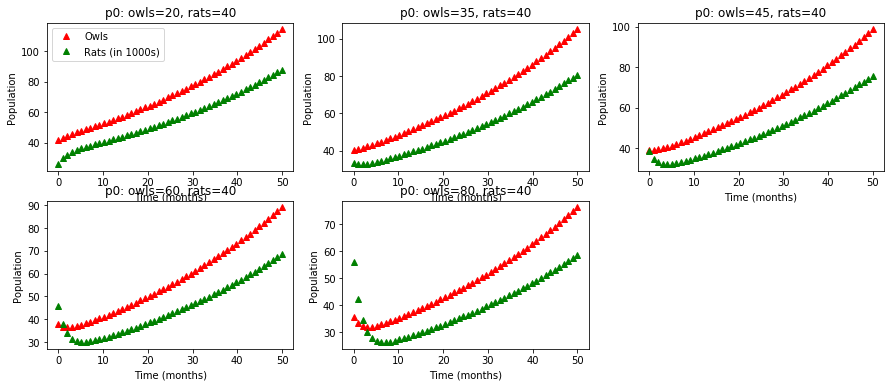

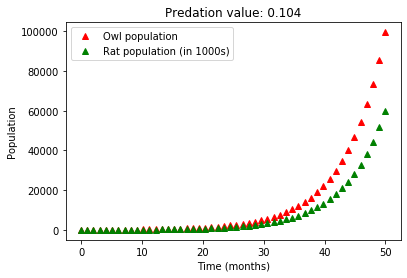

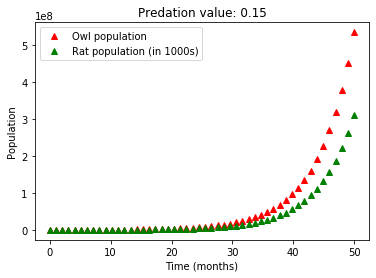

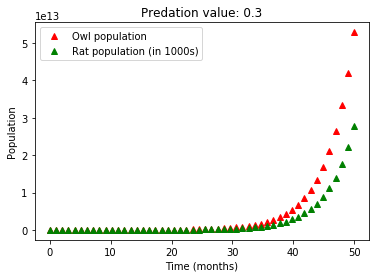

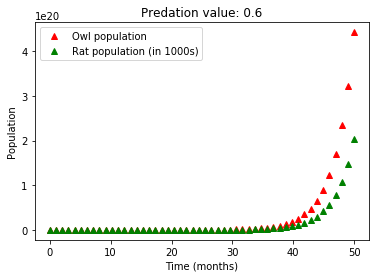

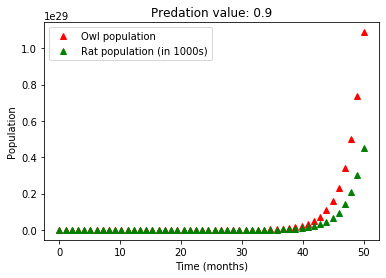

In [115]:
# rats are in 1000s
# timestamp in every month
# without owls, rats grow by 1.10
# without rats as food, owls fall by 0.5
# predation rate is 0.104
# with plentiful rats, owl pop grows by (0.4 * rat)



X = np.array([[50, 50]])

G2 = np.array([[0.5, 0.4],
               [-0.104, 1.1]], dtype=float)

result = G2@X.transpose()

rats = []
owls = []
for i in range(50):
    resultant_m = G2@result
    rats.append(resultant_m[0][0])
    owls.append(resultant_m[1][0])
    result = resultant_m
rats = np.asarray(rats).round(2)
owls = np.asarray(owls).round(2)
    
    
plt.figure(0)
plt.title('Owl and Rat population change')
plt.xlabel('Time (months)')
plt.ylabel('Population number')
plt.plot(np.linspace(0, 50), rats, 'g^', label='Rat population (in 1000s)')
plt.plot(np.linspace(0, 50), owls, 'r^', label='Owl population')
plt.legend(loc='upper left')

plt.figure(1)
plt.title('Owl vs Rat population')
plt.xlabel('Owl population')
plt.ylabel('Rat population (in 1000s)')
plt.plot(owls, rats, 'b^')


def pop_calc(L):
    '''pop1=rats and pop2=owls'''
    pop1 = []
    pop2 = []
    for i in range(50):
        resultant_m = G2 @ L
        pop1.append(resultant_m[0][0])
        pop2.append(resultant_m[1][0])
        L = resultant_m
    pop1 = np.asarray(pop1).round(2)
    pop2 = np.asarray(pop2).round(2)
    return pop2, pop1


# [𝑂𝑤𝑙0,𝑅𝑎𝑡𝑠0]=[20,40], [35,40] [45,40] [60,40] [80,40]
f1 = plt.figure(figsize=(15, 6))
X1 = np.array([[20],
               [40]])
owls, rats = pop_calc(X1)
ax1 = f1.add_subplot(231, xlabel='Time (months)', ylabel='Population', title='p0: owls=20, rats=40')
ax1.plot(np.linspace(0, 50), owls1, 'r^', label='Owls')
ax1.plot(np.linspace(0, 50), rats1, 'g^', label='Rats (in 1000s)')
ax1.legend(loc='upper left')


X2 = np.array([[35],
               [40]])
owls2, rats2 = pop_calc(X2)
ax2 = f1.add_subplot(232, xlabel='Time (months)', ylabel='Population', title='p0: owls=35, rats=40')
ax2.plot(np.linspace(0, 50), owls2, 'r^')
ax2.plot(np.linspace(0, 50), rats2, 'g^')


X3 = np.array([[45],
               [40]])
owls3, rats3 = pop_calc(X3)
ax3 = f1.add_subplot(233, xlabel='Time (months)', ylabel='Population', title='p0: owls=45, rats=40')
ax3.plot(np.linspace(0, 50), owls3, 'r^')
ax3.plot(np.linspace(0, 50), rats3, 'g^')

X4 = np.array([[60],
               [40]])
owls4, rats4 = pop_calc(X4)
ax4 = f1.add_subplot(234, xlabel='Time (months)', ylabel='Population', title='p0: owls=60, rats=40')
ax4.plot(np.linspace(0, 50), owls4, 'r^')
ax4.plot(np.linspace(0, 50), rats4, 'g^')

X5 = np.array([[80],
               [40]])
owls5, rats5 = pop_calc(X5)
ax5 = f1.add_subplot(235, xlabel='Time (months)', ylabel='Population', title='p0: owls=80, rats=40')
ax5.plot(np.linspace(0, 50), owls5, 'r^')
ax5.plot(np.linspace(0, 50), rats5, 'g^')


XX = np.array([[50],
               [50]])
predation_rates = [0.104, 0.15, 0.3, 0.6, 0.9]
graphs = range(3, 8)
for p, figs in zip(predation_rates, graphs):
    owl = []
    rat = []
    G2[1][0] = p
    for w in range(50):
        answer = G2 @ XX
        rat.append(answer[0][0])
        owl.append(answer[1][0])
        XX = answer
    plt.figure(figs)
    plt.title(f'Predation value: {p}')
    plt.xlabel('Time (months)')
    plt.ylabel('Population')
    plt.plot(np.linspace(0, 50), owl, 'r^', label='Owl population')
    plt.plot(np.linspace(0, 50), rat, 'g^', label='Rat population (in 1000s)')
    plt.legend(loc='upper left')


